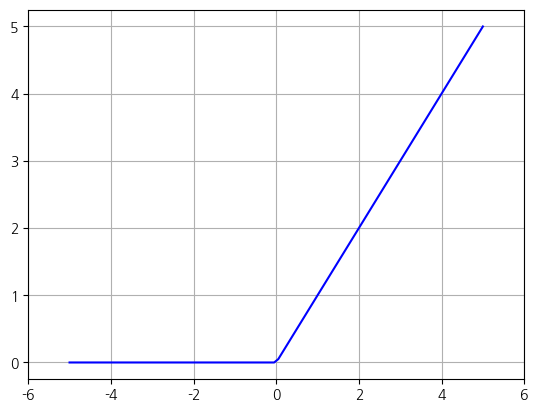

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['axes.unicode_minus'] = False

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-5.0, 5.0, 100)
y = relu(x)
plt.grid()
plt.plot(x, y, 'b')
plt.xlim(-6.0, 6.0)
plt.show()

## 간단한 신경망 구현해보기

In [13]:
import numpy as np

def init_network():
    network = {}
    network['w1'] = np.array([[1,2,3,4], [2,3,4,5], [3,4,5,6]])
    network['b1'] = np.array([[1],[2],[3],[4]])
    network['w2'] = np.array([[1,1,2,2],[2,2,3,3],[3,3,4,4],[4,4,5,5]])
    network['b2'] = np.array([[1],[2],[3],[4]])
    network['w3'] = np.array([[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]])
    network['b3'] = np.array([[1],[2],[3],[4]])
    network['w4'] = np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
    network['b4'] = np.array([[1],[2],[3]])
    return network

def forward(network, x):
    w1, w2, w3, w4 = network['w1'], network['w2'], network['w3'], network['w4']
    b1, b2, b3, b4 = network['b1'], network['b2'], network['b3'], network['b4']

    a1 = np.dot(np.transpose(w1), x) + b1
    z1 = relu(a1)
    
    a2 = np.dot(np.transpose(w2), z1) + b2
    z2 = relu(a2)

    a3 = np.dot(np.transpose(w3), z2) + b3
    z3 = relu(a3)

    out = np.dot(np.transpose(w4), z3) + b4
    return out

network = init_network()
x = np.array([[1],[2],[3]])
forward(network, x)

array([[36471],
       [51058],
       [65645]])

## 가우시안 분포

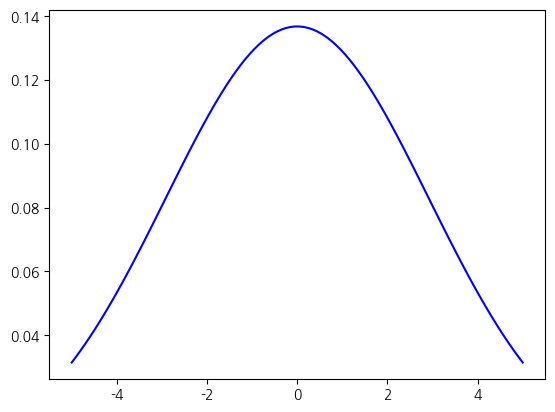

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

def distribution(x, u):
    return np.mean(np.square(x)) - np.square(u)

def gaussian(x):
    u = np.mean(x)
    std = np.sqrt(distribution(x, u))

    return (1/(std*np.sqrt(2*np.pi))) * (np.exp(-(np.square(x-u)/(2*distribution(x,u)))))

x = np.linspace(-5.0, 5.0, 100)
y = gaussian(x)
plt.plot(x, y, 'b')
plt.show()

## 활성 함수

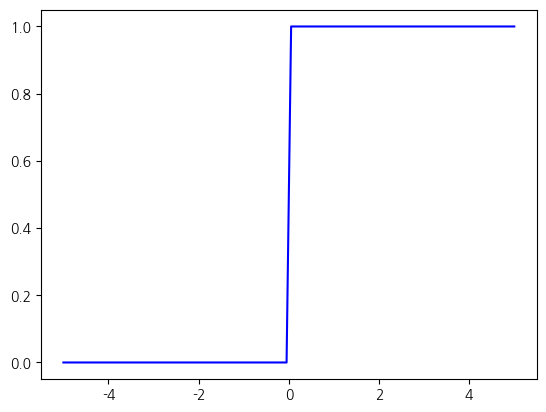

In [15]:
# 계단 함수
def step_function(x):
    y = x > 0
    return y.astype(np.int32)

x = np.linspace(-5.0, 5.0, 100)
y = step_function(x)
plt.plot(x, y, 'b')
plt.show()

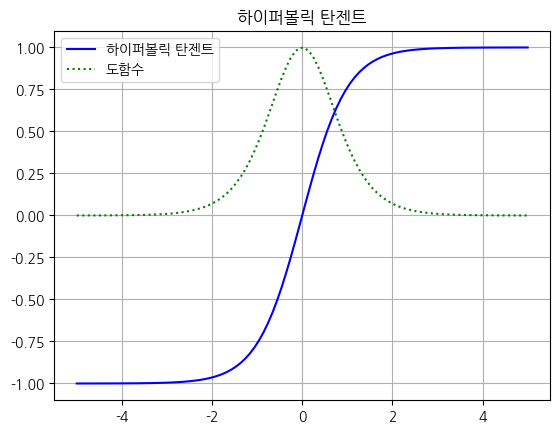

In [16]:
# tanh
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

x = np.linspace(-5.0, 5.0, 100)
y = tanh(x)
y2 = (1-y) * (1+y)
plt.plot(x, y, 'b')
plt.plot(x, y2, 'g', linestyle=':')
plt.grid()
plt.title('하이퍼볼릭 탄젠트')
plt.legend(['하이퍼볼릭 탄젠트', '도함수'])
plt.show()

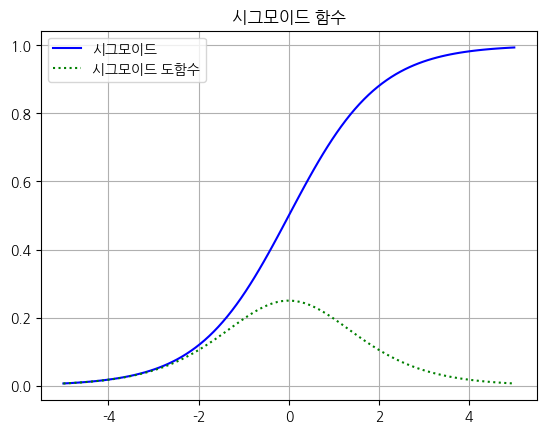

In [17]:
# Sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-5.0, 5.0, 100)
y = sigmoid(x)
y2 = y*(1-y)
plt.plot(x, y, 'b')
plt.plot(x, y2, 'g', linestyle=':')
plt.grid()
plt.title('시그모이드 함수')
plt.legend(['시그모이드', '시그모이드 도함수'])
plt.show()

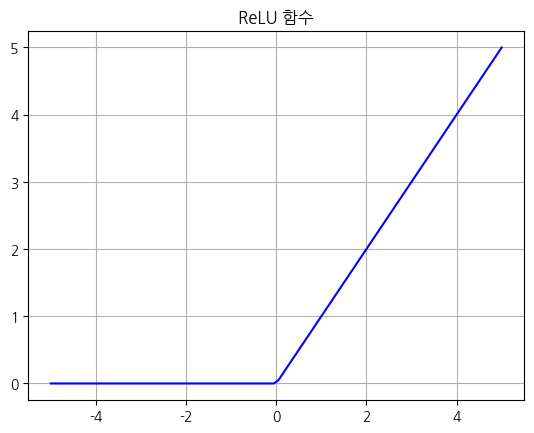

In [18]:
# ReLU
def relu(x):
    return np.maximum(x,0)

x = np.linspace(-5.0, 5.0, 100)
y = relu(x)
plt.grid()
plt.plot(x, y, 'b')
plt.title('ReLU 함수')
plt.show()

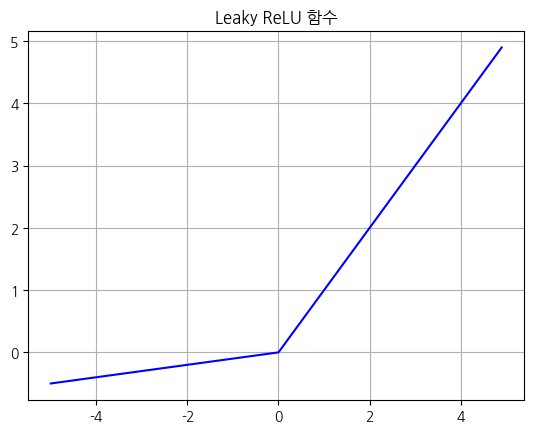

In [19]:
# Leaky ReLU
def leaky_relu(x):
    return np.maximum(x, 0.1*x)

x = np.arange(-5, 5.0, 0.1)
y = leaky_relu(x)
plt.grid()
plt.plot(x, y, 'b')
plt.title('Leaky ReLU 함수')
plt.show()

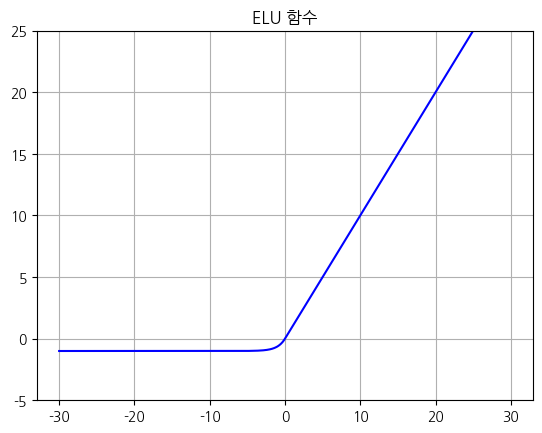

In [20]:
# ELU
def elu(x, a=1):
    return (x>0)*x + (x<=0)*(a*(np.exp(x)-1))

x = np.arange(-30, 30, 0.1)
y = elu(x)
plt.grid()
plt.plot(x, y, 'b')
plt.title('ELU 함수')
plt.ylim(-5, 25)
plt.show()

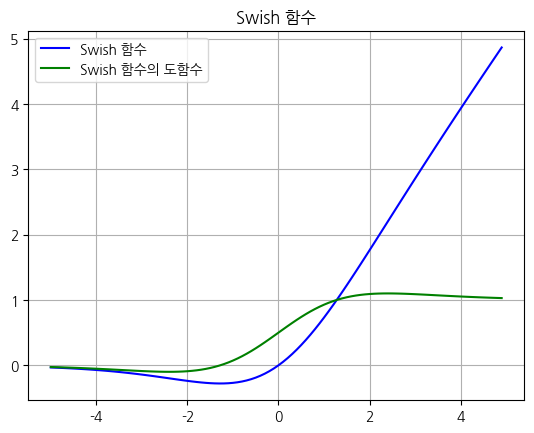

In [21]:
# Swish
def swish(x):
    return x * sigmoid(x)

def d_swish(x):
    return sigmoid(x) + x*sigmoid(x)*(1-(sigmoid(x)))

x = np.arange(-5, 5, 0.1)
y = swish(x)
y2 = d_swish(x) 
plt.grid()
plt.plot(x, y, 'b')
plt.plot(x, y2, 'g')
plt.title('Swish 함수')
plt.legend(['Swish 함수', 'Swish 함수의 도함수'])
plt.show()

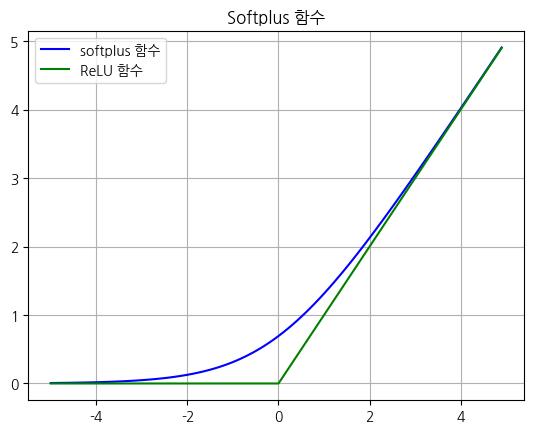

In [22]:
# softplus
def softplus(x):
    return np.log(1+np.exp(x))

x = np.arange(-5, 5, 0.1)
y = softplus(x)
y2 = relu(x)
plt.grid()
plt.plot(x, y, 'b')
plt.plot(x, y2, 'g')
plt.title('Softplus 함수')
plt.legend(['softplus 함수', 'ReLU 함수'])
plt.show()